In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from experiment_train import *
from experiment_datasets import *
from helpers import *
import scipy.stats as st
import matplotlib
import pickle
import scipy
from scipy.optimize import curve_fit
from derivative_decay import *
from experiment_regularization import MNISTExperimentRegularized

Using TensorFlow backend.


Initialized TensorFlow


In [2]:
# dimensions to try
Ns = [int(t) for t in np.linspace(50, 1500, 5)]

# how much repetitions for each experiment are needed?
repetitions = 1

print('Sizes', Ns)
print('Repetitions', repetitions)
print('Total runs', len(Ns) * repetitions)

Sizes [50, 412, 775, 1137, 1500]
Repetitions 1
Total runs 5


In [3]:
def fault_tolerance_var_delta(exp):
    """ Compute variance of the error """
    # obtaining data points
    #data = exp.get_inputs(len(exp.x_train) + len(exp.x_test))
    data = exp.x_train[0:1]

    # obtaining errors and bounds for data points
    rmean, rstd = exp.run(data, repetitions = 50000)

    return {'var_delta': np.mean(rstd['experiment'] ** 2)}

In [4]:
# parameters for each experiment
parameters = {'reg_coeff': [1e-4, 1e-2], 'reg_type': 'continuous', 'do_print': 'plot', 'epochs': 30, 'p': 0.01}
parameters.update({'reg_bound': 'v3', 'reg_bound_coeff': 0.001, 'experiment': MNISTExperimentRegularized})#, 'do_print': True})

# what to measure?
to_run = [show_neurons_1, dataset_metrics, show_W_profile, W_inf_norm, mean_dLdy, mean_d2Ldy2, fault_tolerance_var_delta]

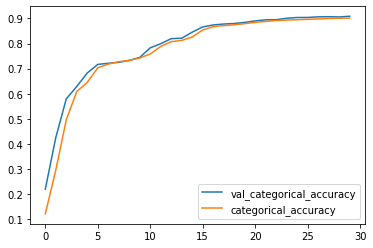

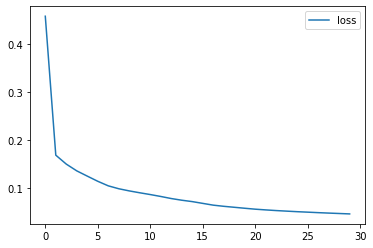

In [7]:
# obtaining an experiment
# scale
exp = experiment_for_N(10, parameters)

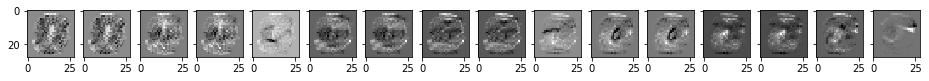

{'val_acc': 0.9088999986648559, 'train_acc': 0.9014833331108093, 'val_loss': 0.04466392956674099, 'train_loss': 0.045498742659886675}
Layer 0


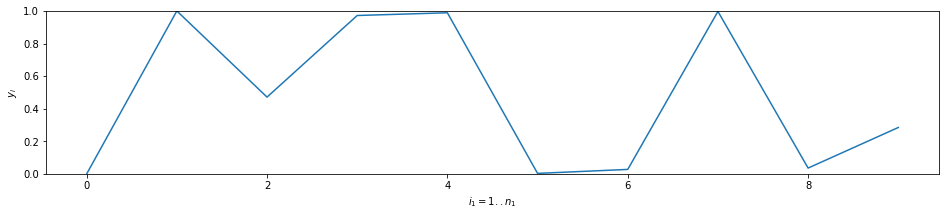

IntDer, Conv {'derivative': 54.810307, 'smoothness': 0.0}
Layer 1


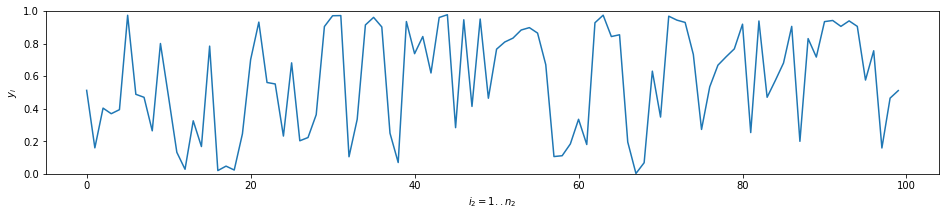

IntDer, Conv {'derivative': 94.05007, 'smoothness': 0.5198481}
Layer 2


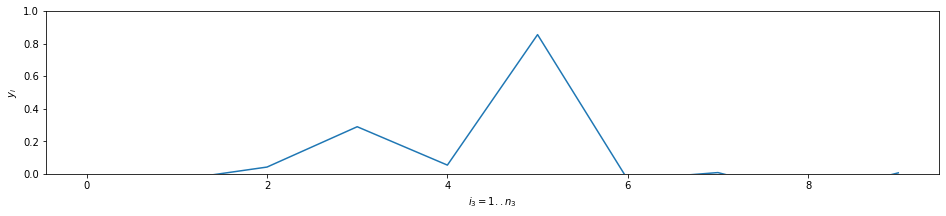

IntDer, Conv {'derivative': 79.43736, 'smoothness': 0.0}
True ans #0 5


{'val_acc': 0.9088999986648559,
 'train_acc': 0.9014833331108093,
 'val_loss': 0.04466392956674099,
 'train_loss': 0.045498742659886675,
 'act_0': array([3.5882773e-04, 9.9988163e-01, 4.7154498e-01, 9.7193301e-01,
        9.8858845e-01, 3.7047670e-03, 2.8094323e-02, 9.9674916e-01,
        3.6378343e-02, 2.8517070e-01], dtype=float32),
 'act_1': array([0.51288015, 0.16037704, 0.40399078, 0.36968493, 0.39452973,
        0.9733522 , 0.4886194 , 0.47027946, 0.26477146, 0.80018455,
        0.46932694, 0.13298023, 0.02898417, 0.3262394 , 0.1684011 ,
        0.7841554 , 0.02094872, 0.04826766, 0.02439489, 0.24617456,
        0.701074  , 0.9314075 , 0.56107914, 0.55210024, 0.232619  ,
        0.68155813, 0.20367011, 0.223602  , 0.36364204, 0.9043013 ,
        0.97043926, 0.97142076, 0.10575253, 0.3354657 , 0.9139849 ,
        0.9604834 , 0.90172005, 0.25015953, 0.07037657, 0.9348557 ,
        0.73784626, 0.84298205, 0.61955845, 0.95981747, 0.97666717,
        0.28419194, 0.94582886, 0.41437992

In [8]:
get_metrics(exp, to_run)

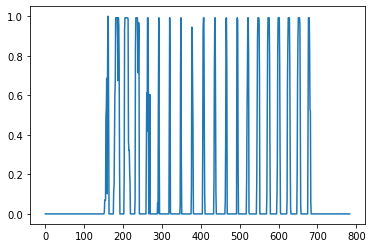

In [5]:
# does x have continuous limit?
# no, not really - it has ~28 discontinuities by construction
# need 2D?
plt.plot(exp.x_train[0])

  0%|          | 0/5 [00:00<?, ?it/s]

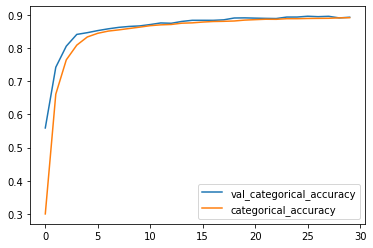

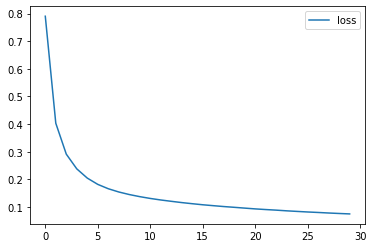

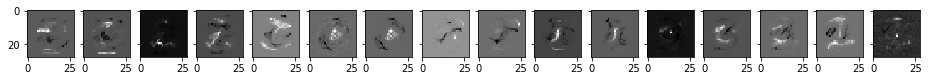

{'val_acc': 0.8926999986171722, 'train_acc': 0.8913166681925456, 'val_loss': 0.07330194115638733, 'train_loss': 0.07510635231932004}
Layer 0


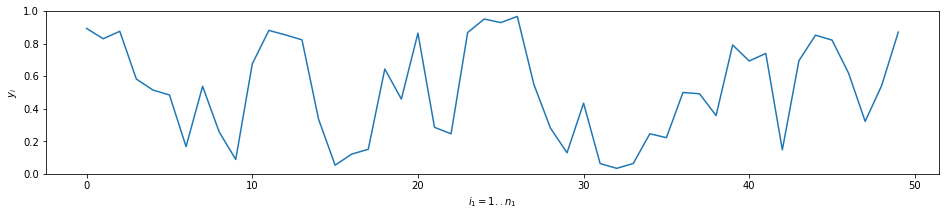

IntDer, Conv {'derivative': 46.625816, 'smoothness': 0.95349646}
Layer 1


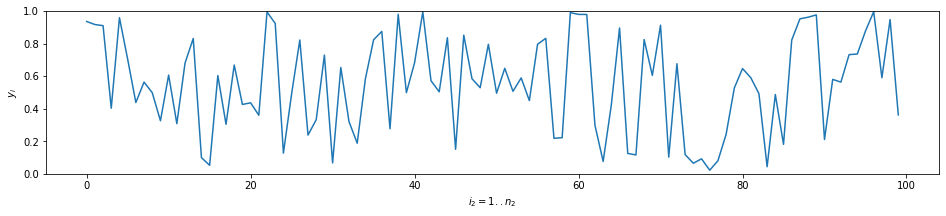

IntDer, Conv {'derivative': 133.96898, 'smoothness': 0.72210276}
Layer 2


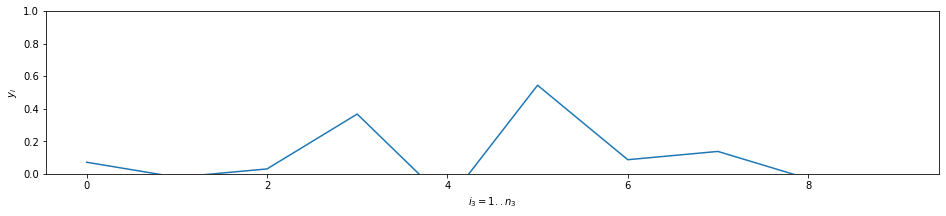

IntDer, Conv {'derivative': 85.32776, 'smoothness': 0.0}
True ans #0 5


 20%|██        | 1/5 [00:26<01:45, 26.31s/it]

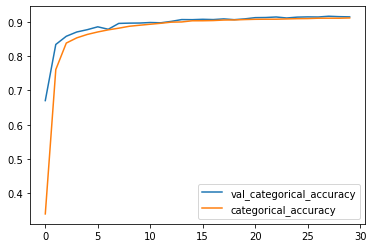

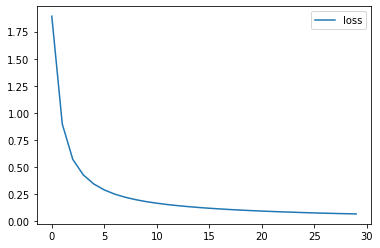

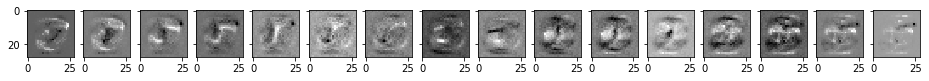

{'val_acc': 0.9145000040531158, 'train_acc': 0.9113500018914541, 'val_loss': 0.06761181838810444, 'train_loss': 0.06916714161634445}
Layer 0


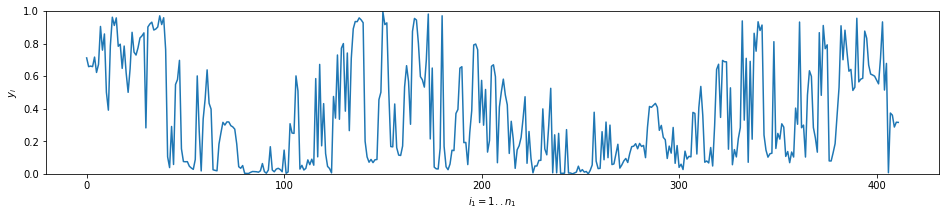

IntDer, Conv {'derivative': 85.44153, 'smoothness': 0.2236575}
Layer 1


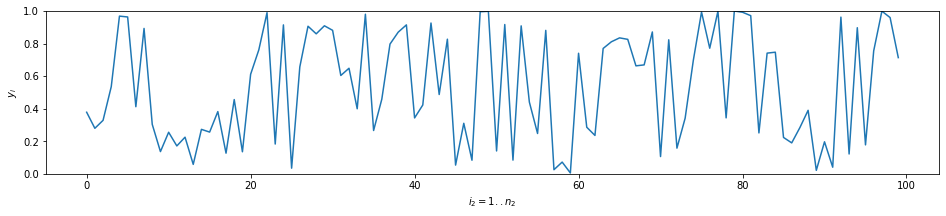

IntDer, Conv {'derivative': 111.50734, 'smoothness': 0.54374105}
Layer 2


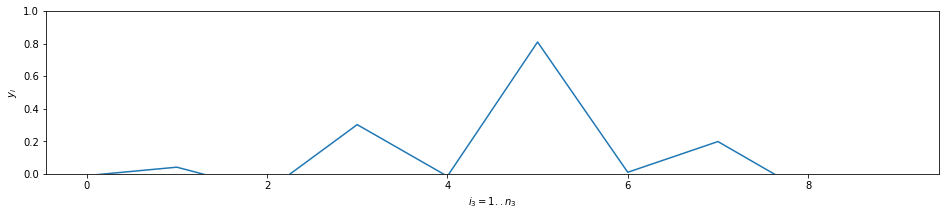

IntDer, Conv {'derivative': 77.39158, 'smoothness': 0.0}
True ans #0 5


 40%|████      | 2/5 [00:55<01:21, 27.08s/it]

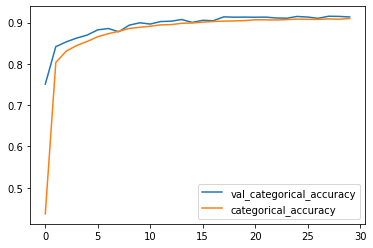

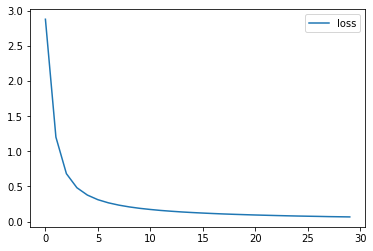

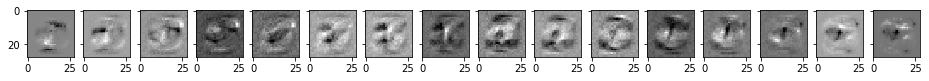

{'val_acc': 0.9134999930858612, 'train_acc': 0.9097833335399628, 'val_loss': 0.064813981205225, 'train_loss': 0.06616680820782979}
Layer 0


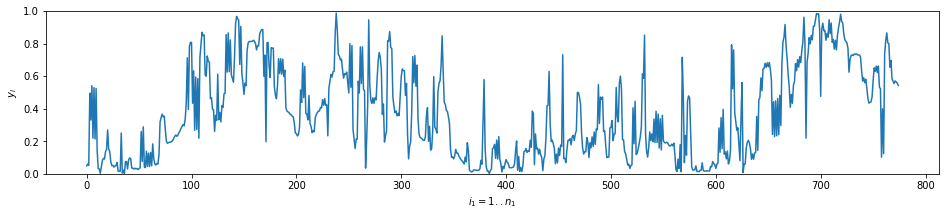

IntDer, Conv {'derivative': 104.56687, 'smoothness': 0.19972877}
Layer 1


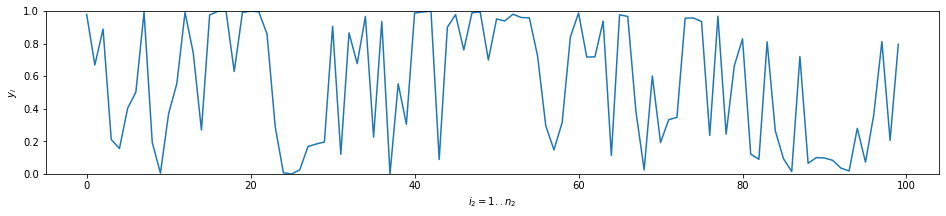

IntDer, Conv {'derivative': 85.346954, 'smoothness': 0.4082349}
Layer 2


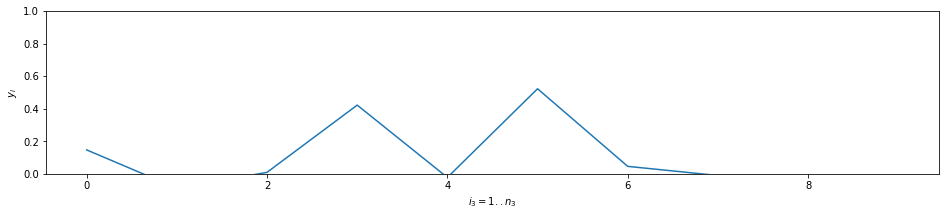

IntDer, Conv {'derivative': 73.10705, 'smoothness': 0.0}
True ans #0 5


 60%|██████    | 3/5 [01:38<01:04, 32.04s/it]

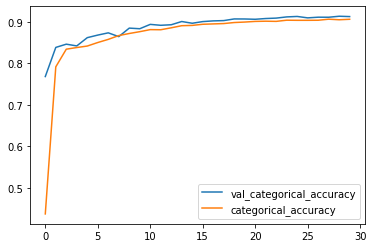

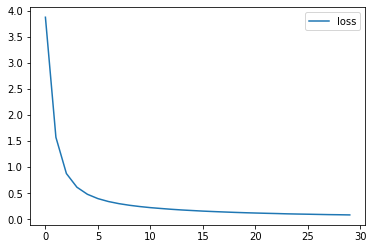

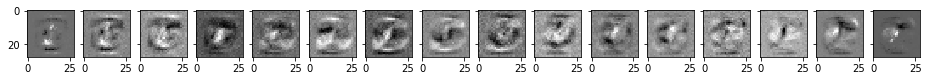

{'val_acc': 0.9123000025749206, 'train_acc': 0.9057999988396962, 'val_loss': 0.07620891258120537, 'train_loss': 0.07863871405522029}
Layer 0


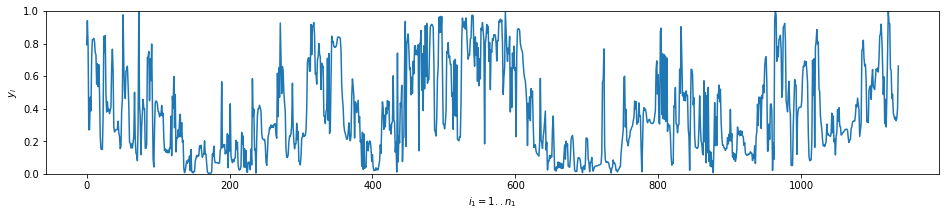

IntDer, Conv {'derivative': 130.25275, 'smoothness': 0.20625576}
Layer 1


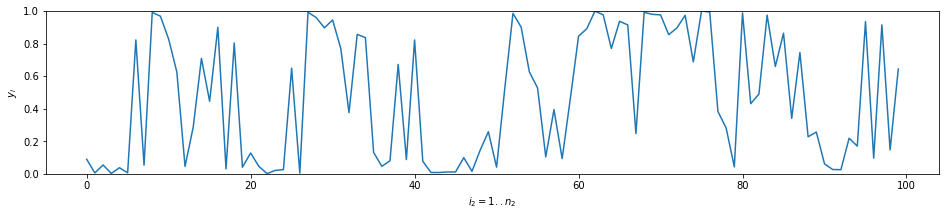

IntDer, Conv {'derivative': 100.69905, 'smoothness': 0.49933502}
Layer 2


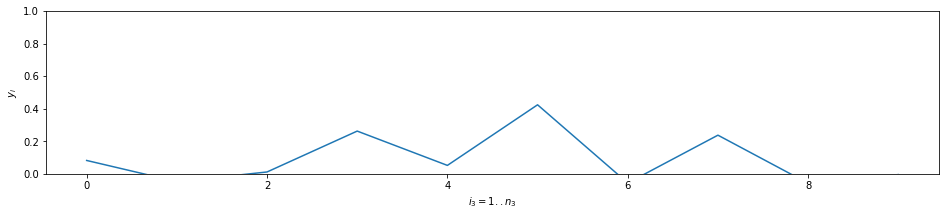

IntDer, Conv {'derivative': 75.213295, 'smoothness': 0.0}
True ans #0 5


 80%|████████  | 4/5 [02:36<00:39, 39.68s/it]

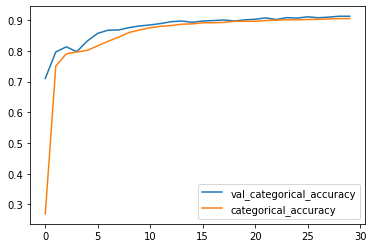

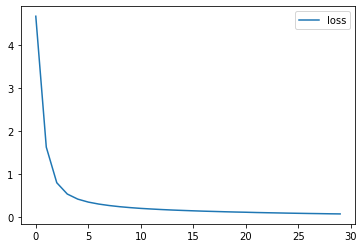

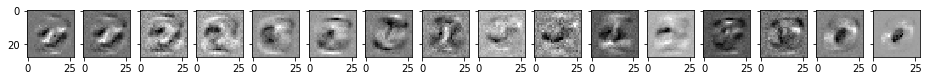

{'val_acc': 0.9128999948501587, 'train_acc': 0.9053333302338918, 'val_loss': 0.07557200789451599, 'train_loss': 0.07809859737753869}
Layer 0


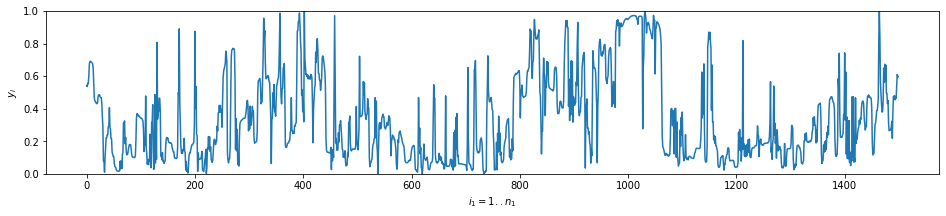

IntDer, Conv {'derivative': 165.53232, 'smoothness': 0.21972978}
Layer 1


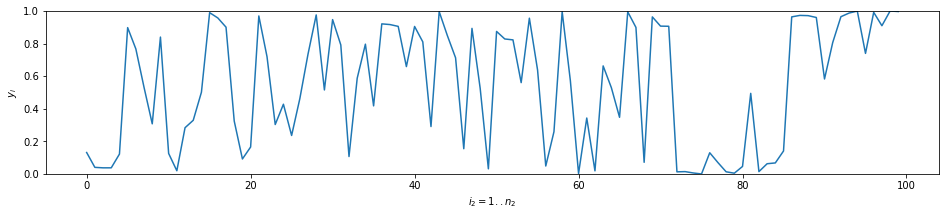

IntDer, Conv {'derivative': 85.88723, 'smoothness': 0.41780195}
Layer 2


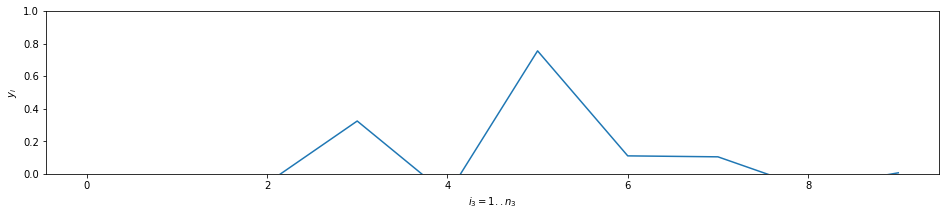

IntDer, Conv {'derivative': 67.70054, 'smoothness': 0.0}
True ans #0 5


100%|██████████| 5/5 [03:50<00:00, 46.10s/it]


In [9]:
# measuring...
results = get_results(Ns, repetitions, parameters, to_run)

In [10]:
pickle_w(results, "FaultTolerance-Continuity-FC-MNIST")

In [11]:
# filters at L1 look random when no regular/ization with continuity!

In [12]:
# loading results from a file
results = pickle_r("FaultTolerance-Continuity-FC-MNIST")

In [13]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

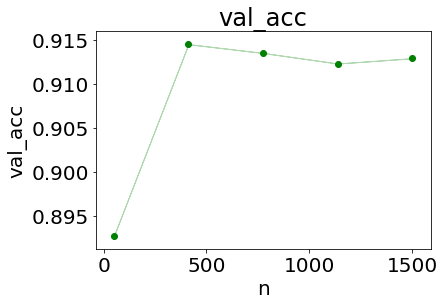

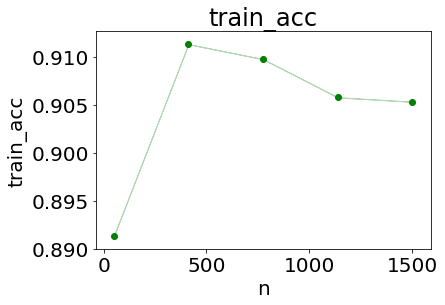

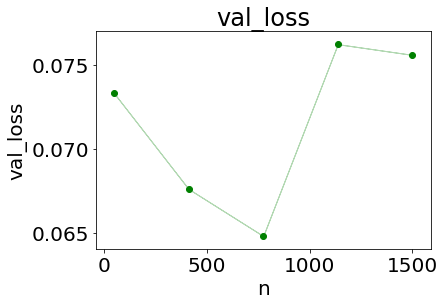

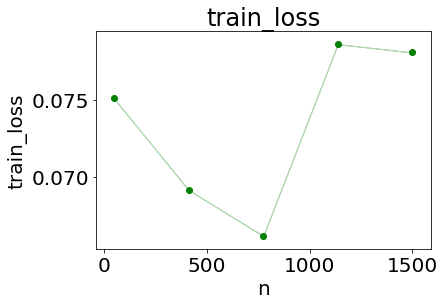

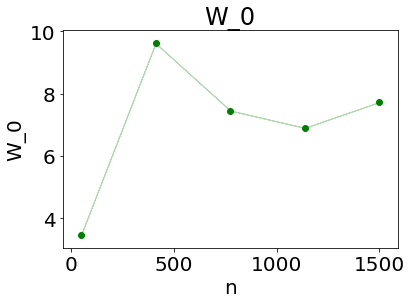

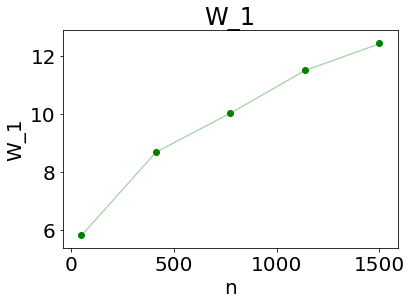

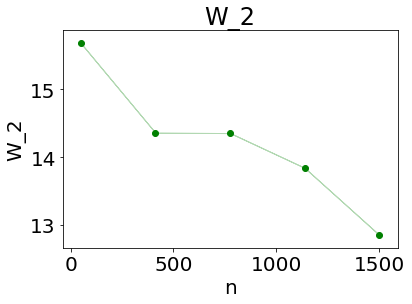

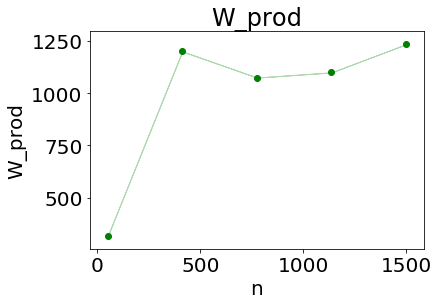

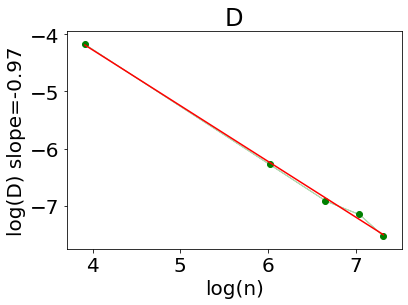

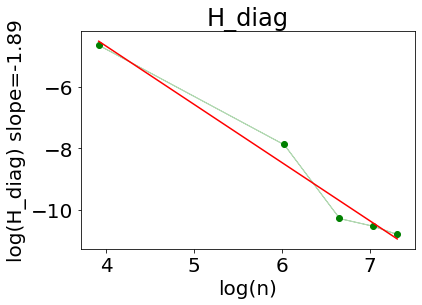

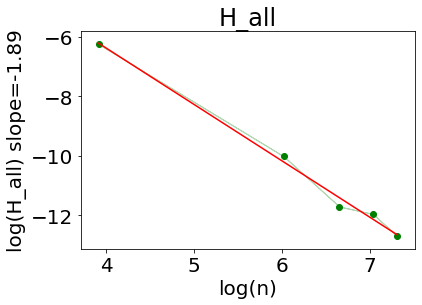

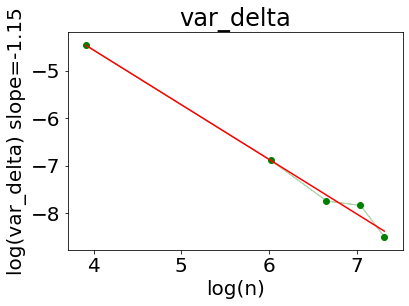

In [15]:
plot_results(Ns, results, name = 'FaultTolerance-Continuity-FC-MNIST')

|W| seems to level out, D and H decay as they should (0.97 and 1.95)